<a href="https://colab.research.google.com/github/TrishKedi/AI-Coursework/blob/main/ML11_Code03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to fit the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create the CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data before feeding it to the fully connected layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.8718 - loss: 1.8730 - val_accuracy: 0.9788 - val_loss: 0.0686
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9820 - loss: 0.0602 - val_accuracy: 0.9829 - val_loss: 0.0552
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9873 - loss: 0.0396 - val_accuracy: 0.9819 - val_loss: 0.0615
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 60ms/step - accuracy: 0.9896 - loss: 0.0311 - val_accuracy: 0.9845 - val_loss: 0.0498
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9909 - loss: 0.0273 - val_accuracy: 0.9856 - val_loss: 0.0527


In [ ]:
# Evaluate the CNN on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9833 - loss: 0.0653
Test Accuracy: 98.56%


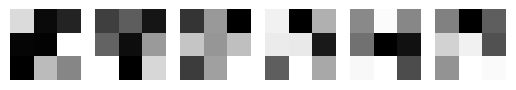

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models

# Extract the first convolutional layer from the model
layer = model.layers[0]
filters, biases = layer.get_weights()

# Normalize filter values for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first 6 filters
n_filters = 6
for i in range(n_filters):
    plt.subplot(1, n_filters, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()
